# INFO 523- PROJECT

## Customer Churn Insight: Predicting and Preventing Subscription Attrition

#### TEAM MEMBERS: Krisha Vardhni, Neha Chaudhari, Smit Shah

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("customer.csv")

print(data.head())

   AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

      PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0      Mailed check               No        Both                No   
1       Credit card              Yes      Movies                No   
2      Mailed check              Yes      Movies                No   
3  Electronic check               No    TV Shows                No   
4  Electronic check              Yes    TV Shows                No   

  DeviceRegistered  ViewingHoursPerWeek  ...  ContentDownloadsPerMonth  \
0           Mobile            36.758104  ...                        10   
1           Tablet            32.450568  ...  

In [3]:
print("\nColumns in the dataset:")
print(data.columns)


Columns in the dataset:
Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')


In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64


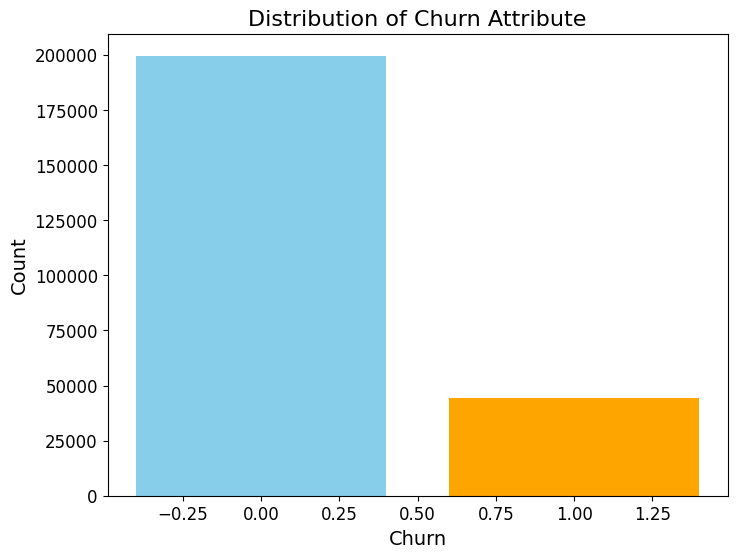

In [5]:
churn_counts = data['Churn'].value_counts()

# Plot the barplot
plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'orange'])
plt.title('Distribution of Churn Attribute', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

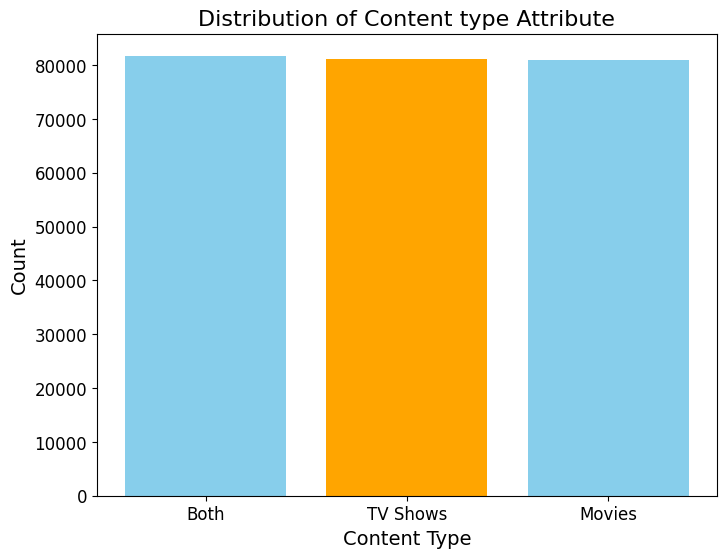

In [6]:
churn_counts = data['ContentType'].value_counts()

# Plot the barplot
plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'orange'])
plt.title('Distribution of Content type Attribute', fontsize=16)
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

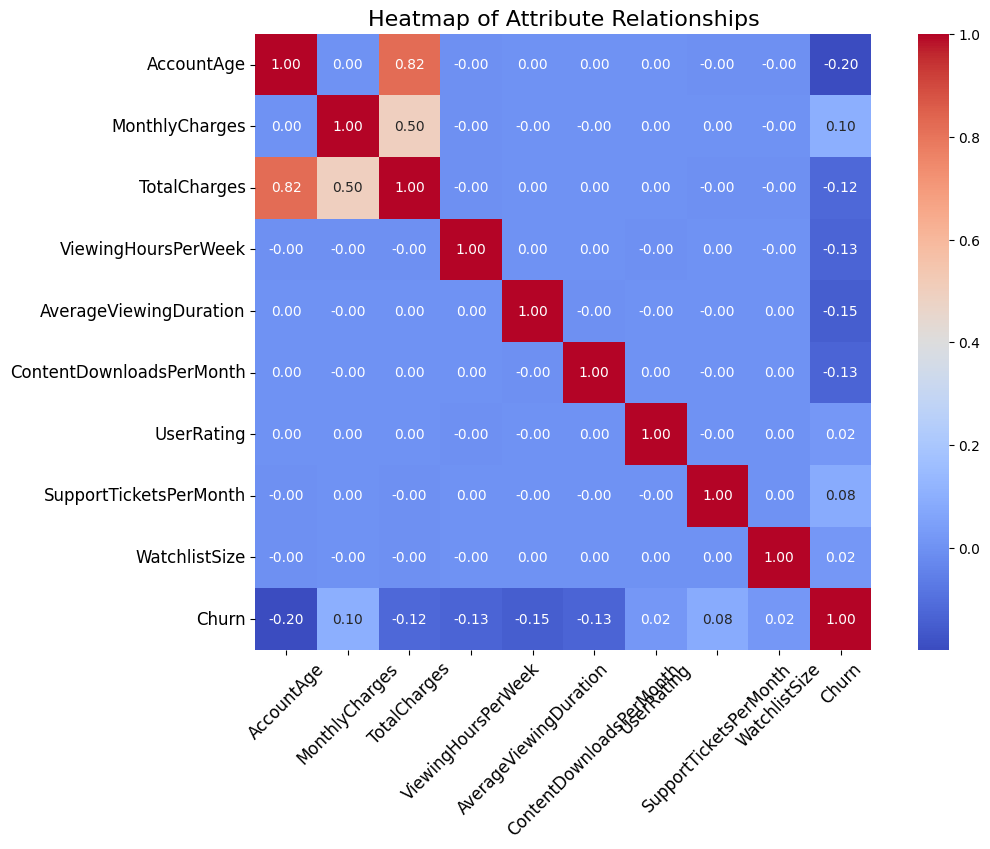

In [7]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Check if numeric data is empty
if numeric_data.empty:
    print("No numerical columns found in the dataset.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
    plt.title('Heatmap of Attribute Relationships', fontsize=16)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.show()

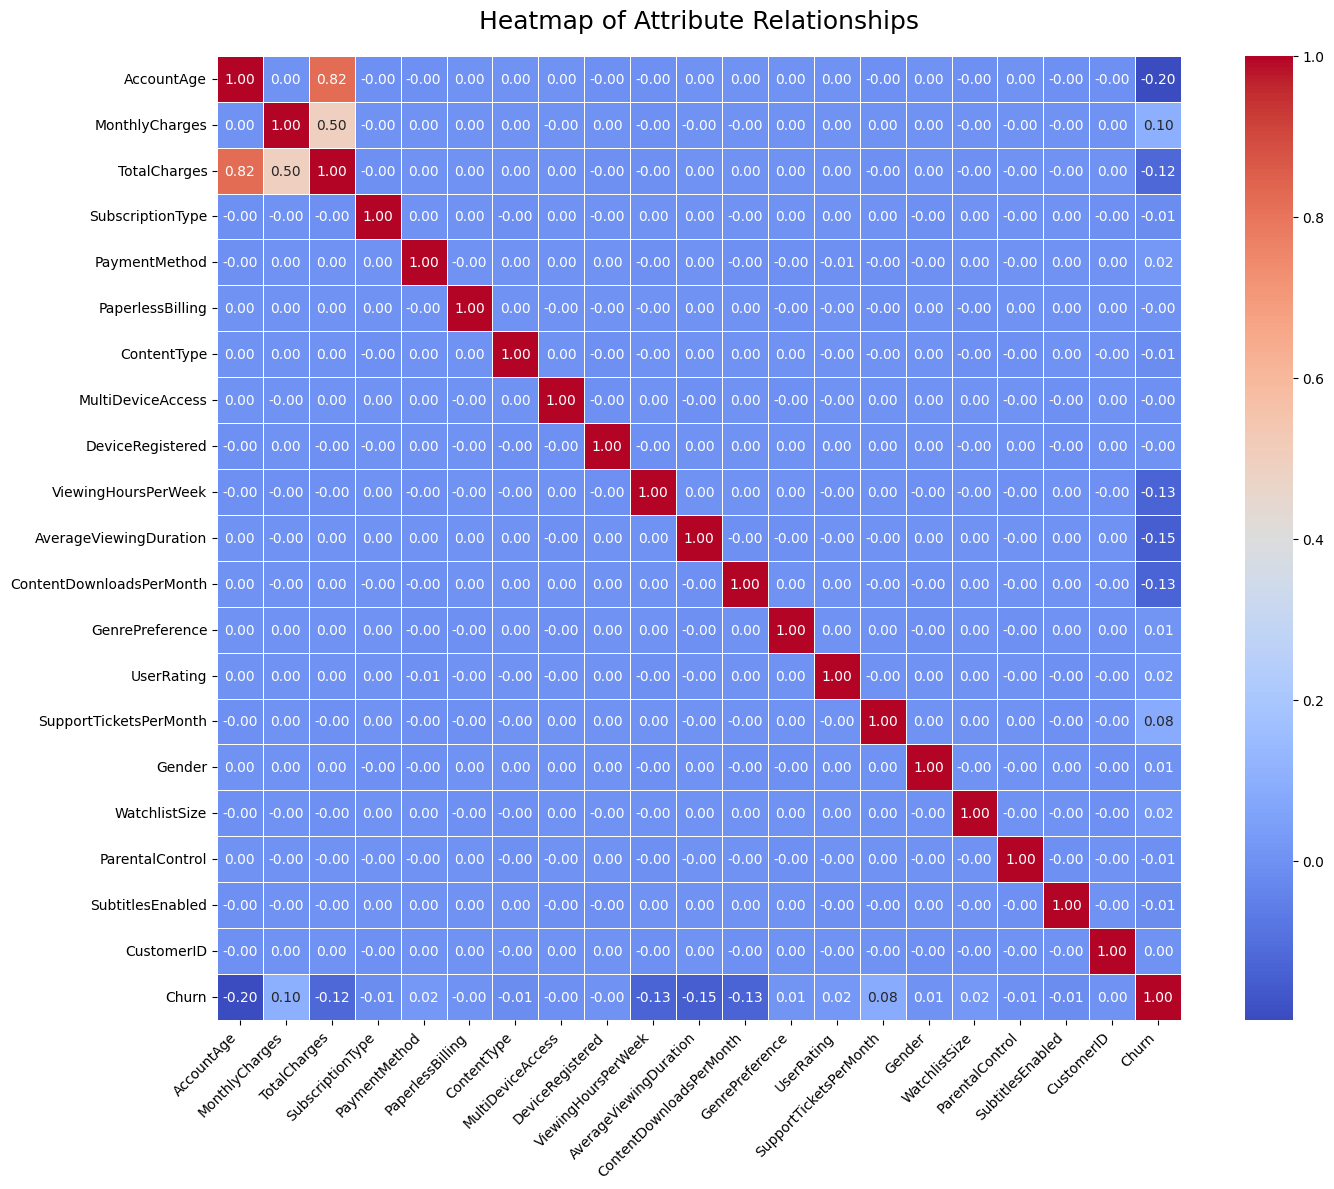

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
encoded_data = data.copy()
for col in data.select_dtypes(include=['object']).columns:
    encoded_data[col] = LabelEncoder().fit_transform(data[col])

correlation_matrix = encoded_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))  
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    cbar=True, 
    square=True, 
    linewidths=0.5
)

plt.title('Heatmap of Attribute Relationships', fontsize=18, pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right') 
plt.yticks(fontsize=10)
plt.tight_layout() 
plt.show()


## Question 1

In [11]:

from mlxtend.frequent_patterns import apriori, association_rules

# Focus only on retained customers
retained_customers = data[data['Churn'] == 0]  # Assuming 'Churn' column indicates customer status

# Select only the categorical attributes
attributes = ['SubscriptionType', 'PaymentMethod', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'ParentalControl']

# One-hot encode categorical attributes
encoded_data = pd.get_dummies(retained_customers[attributes])

# Filter out columns with low frequency (e.g., appearing in less than 1% of the data)
frequent_columns = encoded_data.columns[encoded_data.sum() > len(encoded_data) * 0.01]
filtered_data = encoded_data[frequent_columns]

# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(filtered_data, min_support=0.05, use_colnames=True)

# Calculate the total number of frequent itemsets
num_itemsets = frequent_itemsets['itemsets'].count()
print(num_itemsets)
# Generate association rules
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="lift", min_threshold=1.0)

# Sort rules by lift for insights
rules = rules.sort_values(by='lift', ascending=False)

# Display the top 10 rules
top_10_rules = rules.head(10)
print("Top 10 Association Rules:")
print(top_10_rules)


243
Top 10 Association Rules:
                                           antecedents  \
29                        (PaymentMethod_Mailed check)   
28                         (SubscriptionType_Standard)   
57                         (PaymentMethod_Credit card)   
56                           (DeviceRegistered_Mobile)   
303                   (PaymentMethod_Electronic check)   
302        (ParentalControl_No, MultiDeviceAccess_Yes)   
46                       (PaymentMethod_Bank transfer)   
47                           (DeviceRegistered_Tablet)   
305                            (MultiDeviceAccess_Yes)   
300  (PaymentMethod_Electronic check, ParentalContr...   

                                           consequents  antecedent support  \
29                         (SubscriptionType_Standard)            0.246266   
28                        (PaymentMethod_Mailed check)            0.334766   
57                           (DeviceRegistered_Mobile)            0.255700   
56                 

# Question 2

In [13]:

train_data = data                
test_data = pd.read_csv('test.csv')

In [14]:
train_data.drop(['CustomerID'], axis=1, inplace=True)
test_data.drop(['CustomerID'], axis=1, inplace=True)


# Encoding categorical variables
categorical_columns = train_data.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    label_encoders[column] = le

In [17]:
# Splitting features and target
target = 'Churn'
X_train = train_data.drop(target, axis=1)
y_train = train_data[target]
X_test = test_data

# Normalizing numerical features
scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler on training data only
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Using Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

Top 10 Customers at Risk of Churning:
       CustomerID  Churn_Probability
73243  CustomerID           0.665963
10740  CustomerID           0.661822
49193  CustomerID           0.659131
78014  CustomerID           0.645769
69817  CustomerID           0.643112
10132  CustomerID           0.640415
34640  CustomerID           0.639652
93321  CustomerID           0.638494
75085  CustomerID           0.638286
66828  CustomerID           0.638063


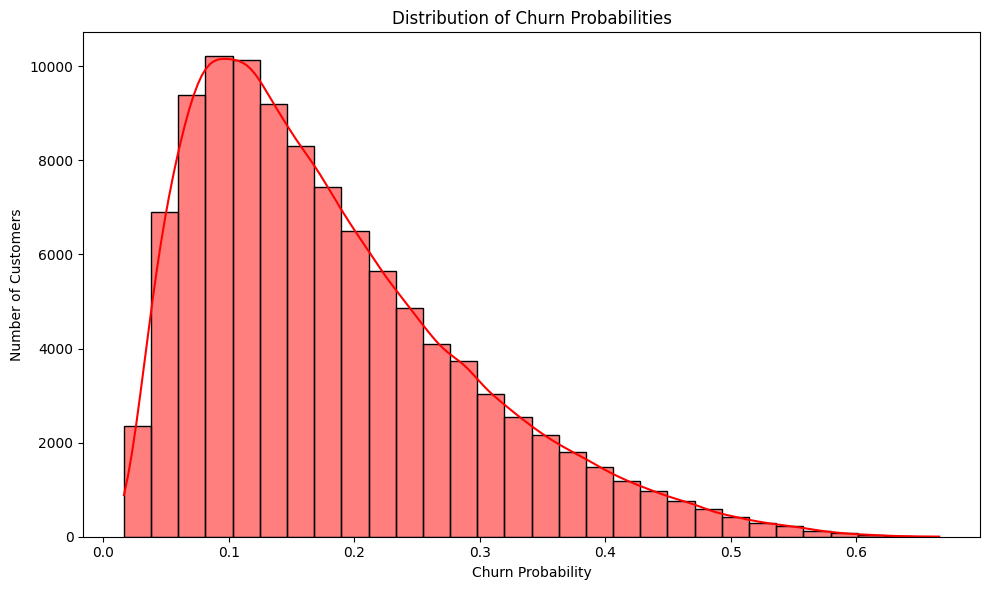

In [ ]:

# Get probabilities of churn (second column corresponds to 'Churn' class)
churn_probabilities = rf_model.predict_proba(X_test_scaled)[:, 1]

# Add churn probabilities and customer IDs to test data for better analysis
results = pd.DataFrame({
    'CustomerID': 'CustomerID',
    'Churn_Probability': churn_probabilities
})

# Rank customers by churn probability (descending order)
customers_at_risk = results.sort_values(by='Churn_Probability', ascending=False)

# Display top N customers at risk
print("Top 10 Customers at Risk of Churning:")
print(customers_at_risk.head(10))


plt.figure(figsize=(10, 6))
sns.histplot(customers_at_risk['Churn_Probability'], bins=30, kde=True, color='red')
plt.title('Distribution of Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_6972\2787397403.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


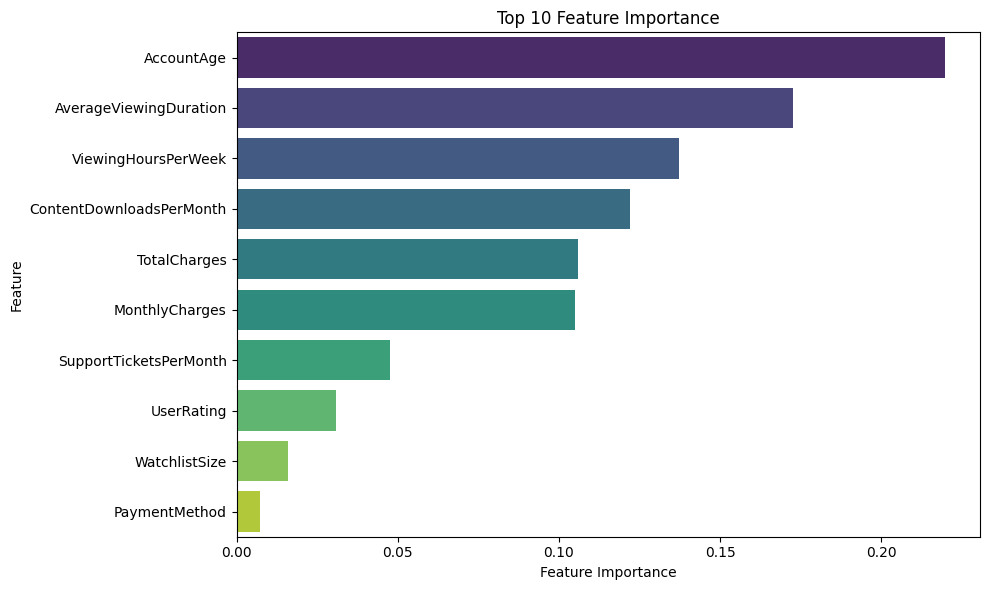

In [ ]:

feature_importances = rf_model.feature_importances_
features = X_train.columns

# Plotting feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# Question 3

In [31]:
data_encoded = data.copy()

#for col in data.select_dtypes(include=['object']).columns:
 #   data_encoded[col] = LabelEncoder().fit_transform(data[col])

#Scaling numerical features
#numerical_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns
#scaler = StandardScaler()
#data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

#print(data_encoded.head())
print(data_encoded.columns)

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'Churn'],
      dtype='object')


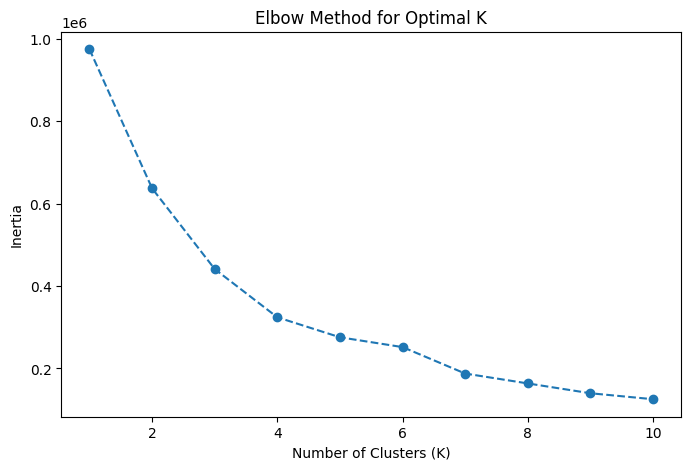

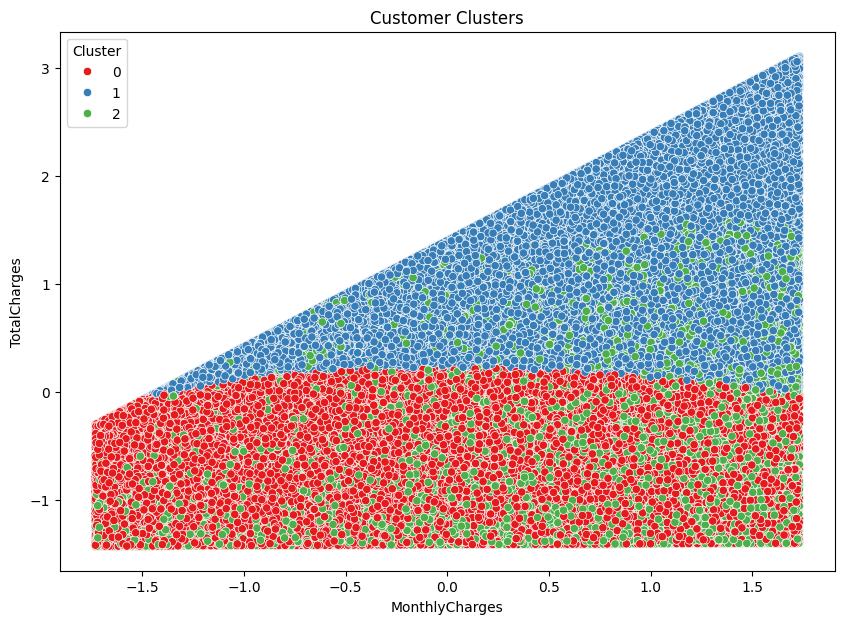

         MonthlyCharges  TotalCharges  AccountAge     Churn
Cluster                                                    
0             10.610278    420.199325   44.584814  0.000000
1             14.834821   1326.057631   91.180908  0.035215
2             13.139756    532.893558   41.490711  1.000000


In [33]:
from sklearn.cluster import KMeans

# Selecting relevant features
features = ['MonthlyCharges', 'TotalCharges', 'AccountAge', 'Churn']  # Example features
X = data_encoded[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Determining the optimal K using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

#Applying K-Means with optimal K 
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('Customer Clusters')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

# Interpreting clusters
print(data.groupby('Cluster')[features].mean())